# Comprehensive Diabetes Analysis and Prediction
This notebook provides a comprehensive analysis of the Pima Indians Diabetes dataset. The goal is to build a robust predictive model for diabetes onset, using various machine learning techniques. The notebook covers exploratory data analysis (EDA), data preprocessing, model building, and evaluation.

### Table of Contents:
1.Introduction

2.Data Exploration and Visualization

3.Data Preprocessing

4.Model Building

5.Model Evaluation and Tuning

6.Conclusion


# Import Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import r2_score,  mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')

# Data Exploration and Visualization

In this section, we will explore the dataset to understand the distribution of features, detect outliers, and examine correlations. Visualizations will be used to uncover patterns and insights.


In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [11]:
import plotly.express as px

for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']:
    fig = px.histogram(df, x=col, nbins=10)
    fig.show()

# Set Insulin values and replace them with median of values


In [12]:
median = df.loc[df['Insulin']<15, 'Insulin'].median()
df.loc[df.Insulin > 240, 'Insulin'] = np.nan
df.fillna(median,inplace=True)

In [13]:
print(df['Insulin'].max())

240.0


# Data Preprocessing¶

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     433
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Replaced zero values with random values within realistic ranges for each column


In [17]:
import random

df["Glucose"] = df["Glucose"].apply(lambda x: random.randint(70, 120) if x == 0 else x)

df["BMI"] = df["BMI"].apply(lambda x: round(random.uniform(18.5, 29.9), 1) if x == 0 else x)

df["Insulin"] = df["Insulin"].apply(lambda x: random.randint(15, 276) if x == 0 else x)

df["BloodPressure"] = df["BloodPressure"].apply(lambda x: random.randint(60, 120) if x == 0 else x)

df["SkinThickness"] = df["SkinThickness"].apply(lambda x: random.randint(10, 50) if x == 0 else x)

In [18]:
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [19]:
df.duplicated().sum()
df.isna().sum() + df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35    231.0  33.6   
1              1       85             66             29    171.0  26.6   
2              8      183             64             26    215.0  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27    207.0  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             14    199.0  30.1   
767            1       93             70             31     80.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

# Data Visualization


In [21]:
fig = px.data.gapminder()
fig = px.bar(df, x='Age', y='Outcome')
fig.show()

In [22]:
fig = px.bar(df, x='Insulin', y='Outcome')
fig.show()

In [23]:
df_outcome = df.groupby('Outcome').size().reset_index(name='Count')

fig = px.pie(df_outcome, values='Count', names='Outcome',
             title='Distribution of Diabetes Outcomes')
fig.show()

In [24]:
fig = px.data.gapminder()
fig = px.bar(df, x='BMI', y='Insulin')
fig.show()

In [25]:
fig = px.data.gapminder()
fig = px.bar(df, x='Pregnancies', y='Outcome')
fig.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

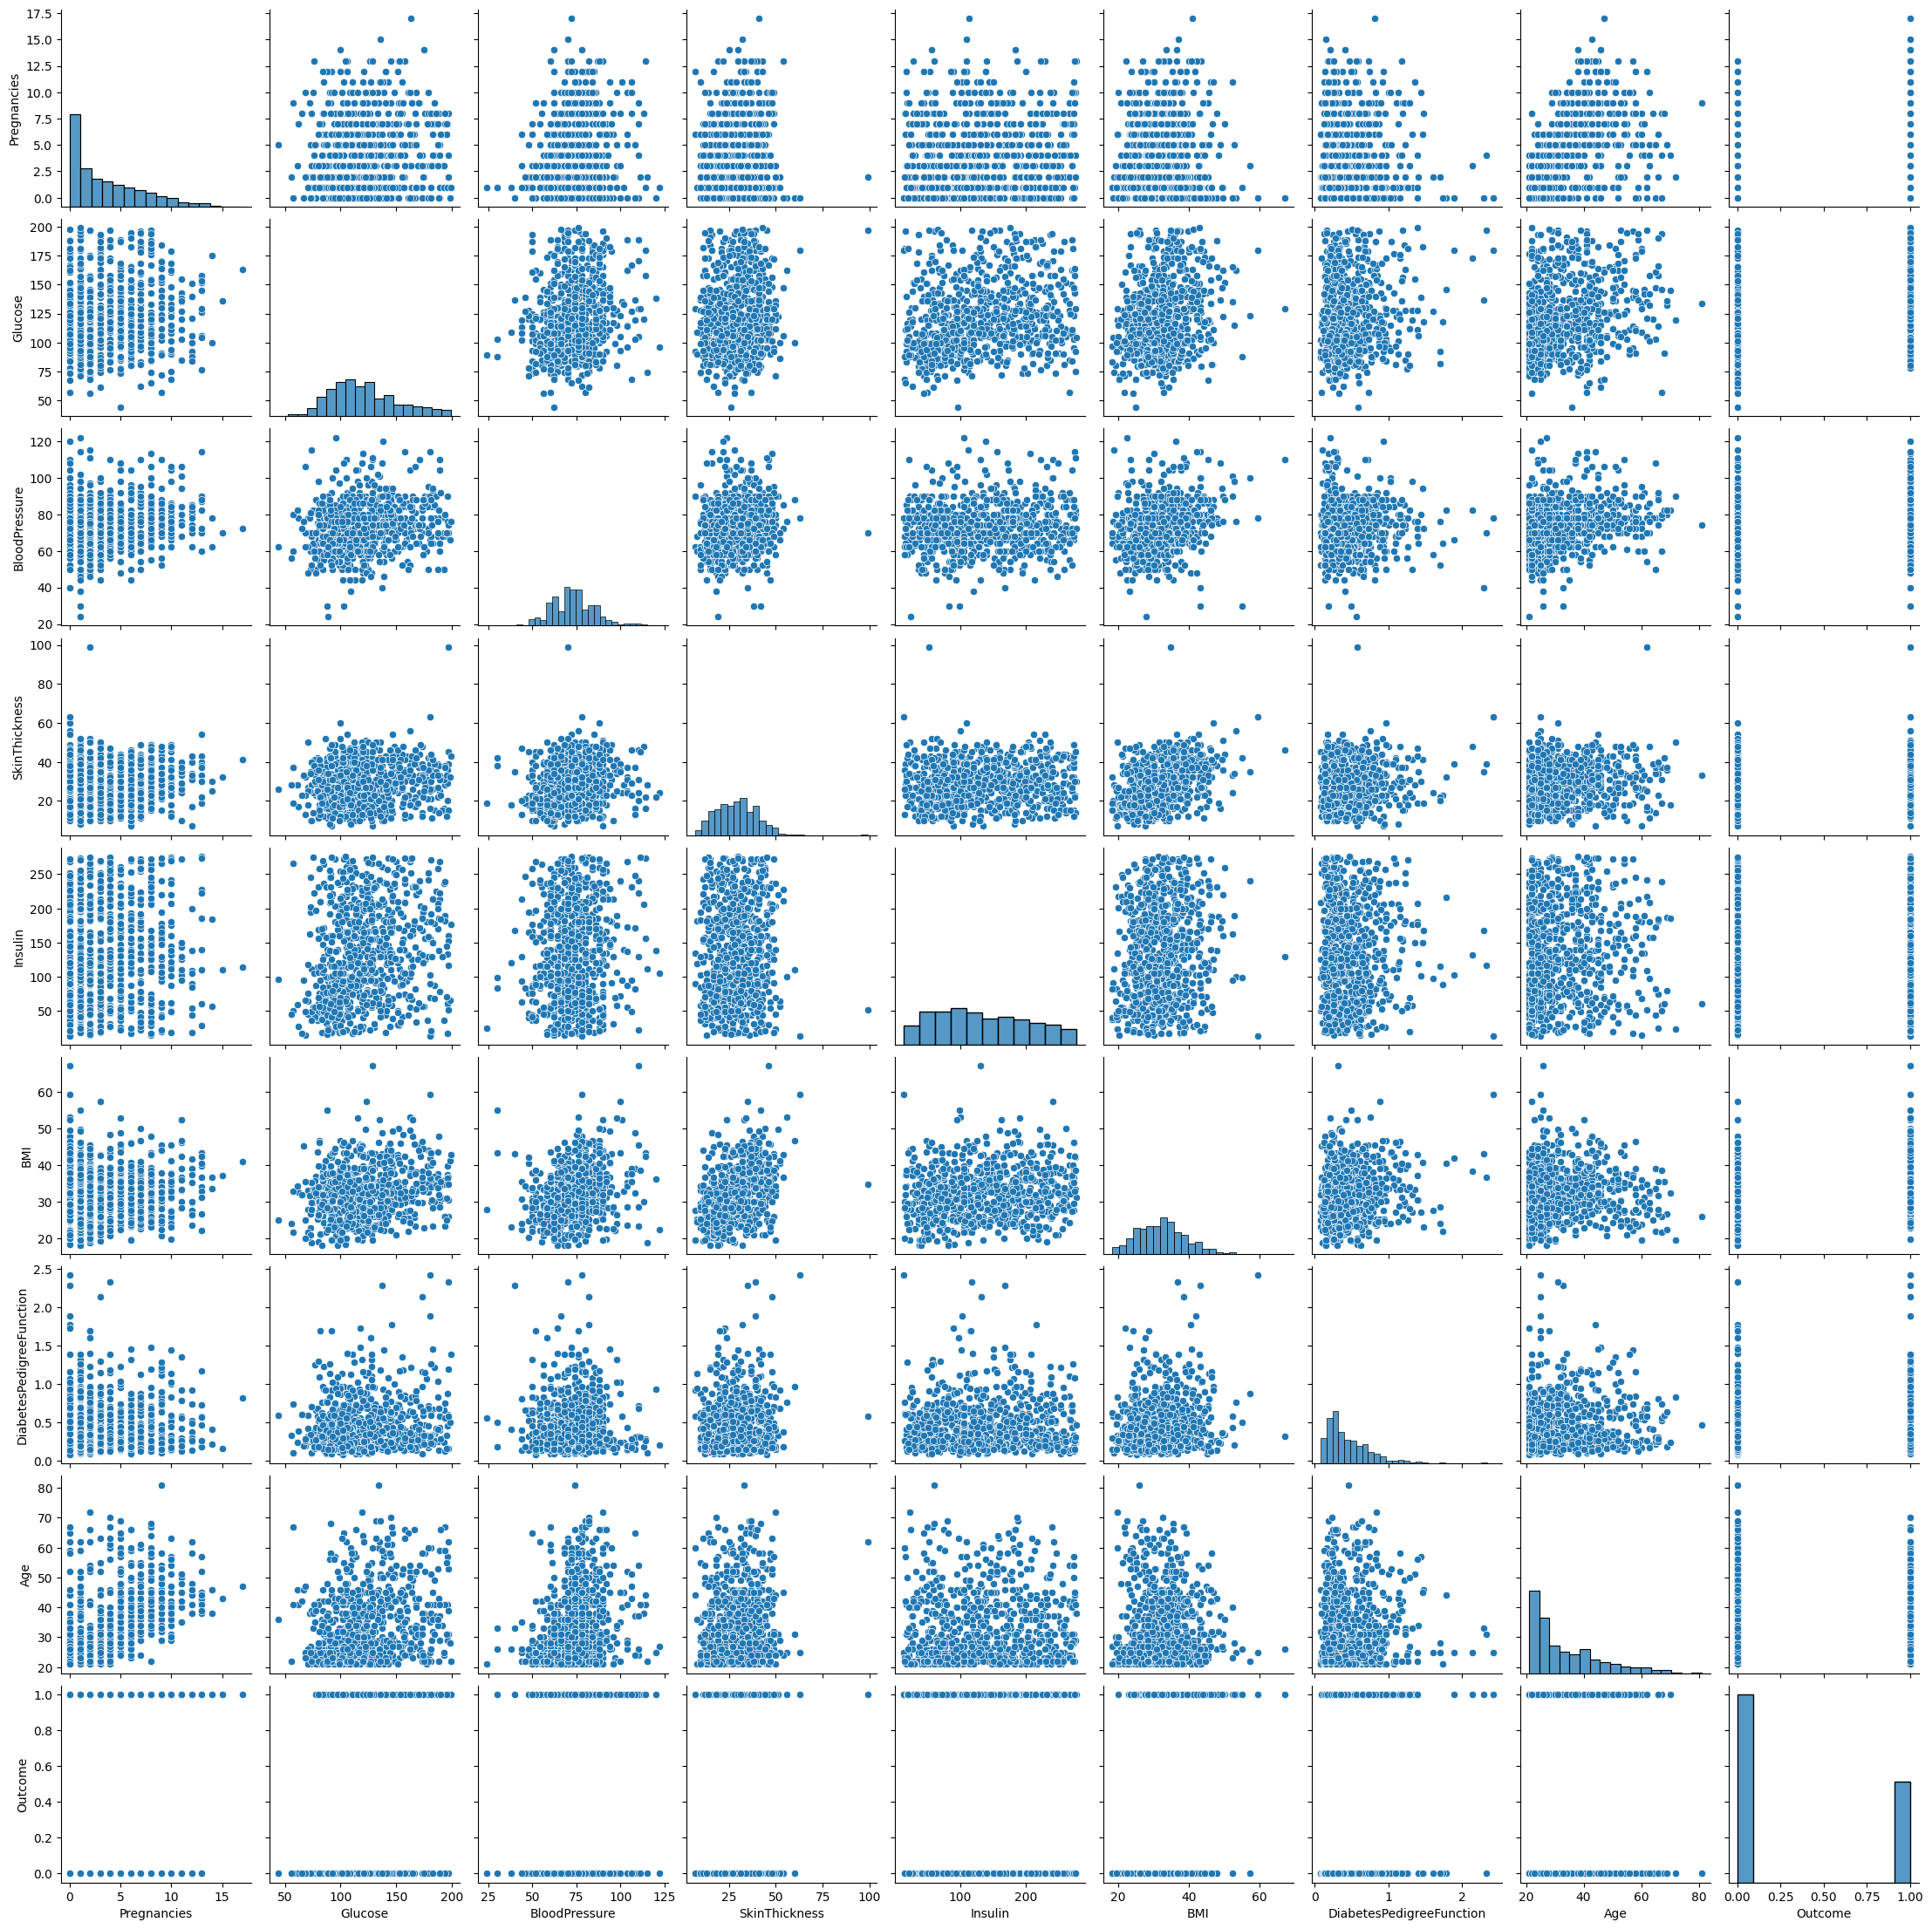

In [26]:
sns.pairplot(df)

In [27]:
fig = px.scatter(df, x='Glucose', y='Pregnancies', color='Outcome',
                 title='Relation between Glucose and Pregnancies by Outcome')
fig.show()

# 1) Regression

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,231.0,33.6,0.627,50,1
1,1,85,66,29,171.0,26.6,0.351,31,0
2,8,183,64,26,215.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


## Splitting Data

In [29]:
x = df.drop(columns=['DiabetesPedigreeFunction' ],axis = 1)
x = x.values
x

array([[  6. , 148. ,  72. , ...,  33.6,  50. ,   1. ],
       [  1. ,  85. ,  66. , ...,  26.6,  31. ,   0. ],
       [  8. , 183. ,  64. , ...,  23.3,  32. ,   1. ],
       ...,
       [  5. , 121. ,  72. , ...,  26.2,  30. ,   0. ],
       [  1. , 126. ,  60. , ...,  30.1,  47. ,   1. ],
       [  1. ,  93. ,  70. , ...,  30.4,  23. ,   0. ]])

In [30]:
y = df.iloc[:,-3].values
y

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.254, 0.205, 0.257,
       0.487, 0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966,
       0.42 , 0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294,
       1.893, 0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467,
       0.718, 0.248, 0.254, 0.962, 1.781, 0.173, 0.304, 0.27 , 0.587,
       0.699, 0.258, 0.203, 0.855, 0.845, 0.334, 0.189, 0.867, 0.411,
       0.583, 0.231, 0.396, 0.14 , 0.391, 0.37 , 0.27 , 0.307, 0.14 ,
       0.102, 0.767, 0.237, 0.227, 0.698, 0.178, 0.324, 0.153, 0.165,
       0.258, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 , 0.323, 0.356,
       0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801, 0.207, 0.287,
       0.336, 0.247, 0.199, 0.543, 0.192, 0.391, 0.588, 0.539, 0.22 ,
       0.654, 0.443, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.261,

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.065, random_state=112)
print(x_train.shape, x_test.shape)


(718, 8) (50, 8)


In [32]:

reg =  LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [33]:
y_pred = reg.predict(x_test)
y_pred

array([0.64065511, 0.57804587, 0.43905178, 0.52830251, 0.3668929 ,
       0.43380501, 0.58395778, 0.40032177, 0.55496867, 0.41879499,
       0.45080293, 0.41472975, 0.59362122, 0.32533804, 0.44624804,
       0.53642019, 0.53317373, 0.43582753, 0.6315765 , 0.54035472,
       0.42776226, 0.38274604, 0.40182435, 0.52446789, 0.39327814,
       0.44883707, 0.44718155, 0.54875335, 0.5820101 , 0.48442645,
       0.49818858, 0.49755103, 0.49406643, 0.58466057, 0.51480974,
       0.47602866, 0.39936625, 0.41673105, 0.57638442, 0.35633285,
       0.46254907, 0.43510154, 0.46781473, 0.578924  , 0.50499555,
       0.45351157, 0.5852748 , 0.34661269, 0.42082495, 0.56159533])

### Regression score

In [34]:
print("R2 =",r2_score(y_test, y_pred))
print("Model score = ",reg.score(x_train,y_train))

R2 = -0.03563964480258197
Model score =  0.05952703739019427


In [35]:
print("MSE: ",mean_squared_error(y_test, y_pred))
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("Y mean: ",y_test.mean())

MSE:  0.057916966092133454
MAE:  0.19492487078443727
Y mean:  0.4580199999999999


#
# 2) Classification

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,231.0,33.6,0.627,50,1
1,1,85,66,29,171.0,26.6,0.351,31,0
2,8,183,64,26,215.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


### Splitting Data

In [37]:
x1 = df.drop(columns=['Outcome'],axis = 1).values
x1

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [38]:
y1 = df.iloc[:,-1].values
y1

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [39]:
x_traincl, x_testcl, y_traincl, y_testcl = train_test_split(x1, y1, test_size=0.06, random_state=88)
print(x_traincl.shape, x_testcl.shape)

(721, 8) (47, 8)


#### Inilize Models

In [40]:
logistic = LogisticRegression()
knn = KNeighborsClassifier ()

#### *KNeighbors

#### Choose best value for n_neighbors

In [41]:
errors = []

for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k, p =1)
    knn.fit(x_traincl, y_traincl)
    y_pred_test = knn.predict(x_testcl)
    error = 1 - accuracy_score(y_testcl,y_pred_test)
    errors.append(error)

Text(0.5, 0, 'K Value')

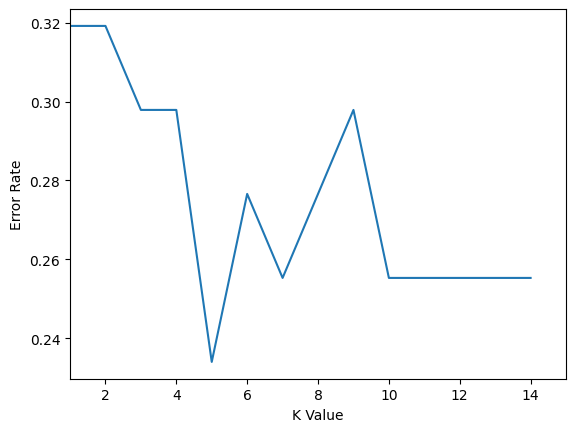

In [42]:

plt.plot(range(1,15),errors)
plt.xlim(1,15)
plt.ylabel('Error Rate')
plt.xlabel("K Value")

##### Use model with best value

In [43]:
knn = KNeighborsClassifier(n_neighbors=13, p =1)
knn.fit(x_traincl, y_traincl)
y_predcl1 = knn.predict(x_testcl)
y_predcl1


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

##### Accuracy Score

In [44]:
accuracy_score(y_testcl,y_predcl1)

0.7446808510638298

##### confusion_matrix

<Axes: >

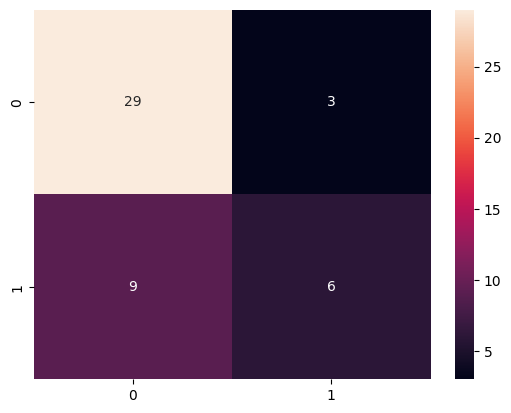

In [45]:
conf= confusion_matrix(y_testcl,y_predcl1)
sns.heatmap(conf, annot=True)

##### Report

In [46]:
print(classification_report(y_testcl,y_predcl1))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.67      0.40      0.50        15

    accuracy                           0.74        47
   macro avg       0.71      0.65      0.66        47
weighted avg       0.73      0.74      0.72        47



#### *LogisticRegression

In [47]:
log = LogisticRegression(C = 1, max_iter=5000)
log.fit(x_traincl, y_traincl)
y_predcl2 = log.predict(x_testcl)
y_predcl2

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

##### Accuracy Score

In [48]:
accuracy_score(y_testcl,y_predcl2)

0.6808510638297872

##### confusion_matrix

<Axes: >

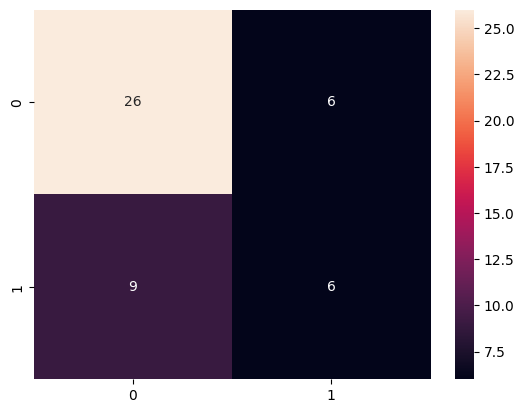

In [49]:
conf= confusion_matrix(y_testcl,y_predcl2)
sns.heatmap(conf, annot=True)

##### Report

In [50]:
print(classification_report(y_testcl,y_predcl2))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.50      0.40      0.44        15

    accuracy                           0.68        47
   macro avg       0.62      0.61      0.61        47
weighted avg       0.67      0.68      0.67        47



## Finally KNN is best in this data with accuracy : **82%**

# 3) Clustring

In [51]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,231.0,33.6,0.627,50,1
1,1,85,66,29,171.0,26.6,0.351,31,0
2,8,183,64,26,215.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [52]:
dfcopy = df.iloc[:,:-1]
x_cluster = dfcopy
x_cluster

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,231.0,33.6,0.627,50
1,1,85,66,29,171.0,26.6,0.351,31
2,8,183,64,26,215.0,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,207.0,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,14,199.0,30.1,0.349,47


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

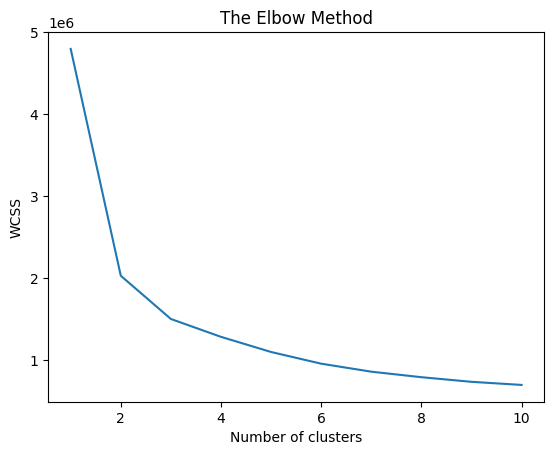

In [53]:
k = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_cluster)
    k.append(kmeans.inertia_)

plt.plot(range(1, 11), k)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### best number of cluser is 3 or 4

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 88)
label = kmeans.fit_predict(x_cluster)
label

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0,
       1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0,
       0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1,
       2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1,
       0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1,
       1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 1, 2, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1,
       0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1,
       0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1,

In [55]:
dfcopy['labels'] = label
dfcopy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,labels
0,6,148,72,35,231.0,33.6,0.627,50,0
1,1,85,66,29,171.0,26.6,0.351,31,2
2,8,183,64,26,215.0,23.3,0.672,32,0
3,1,89,66,23,94.0,28.1,0.167,21,1
4,0,137,40,35,168.0,43.1,2.288,33,2
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,2
764,2,122,70,27,207.0,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,2
766,1,126,60,14,199.0,30.1,0.349,47,0


# Conclusion
The notebook concludes with a summary of findings, including the best-performing model and key insights gained from the analysis. The importance of data preprocessing and model selection is highlighted in achieving optimal predictive accuracy.